In [2]:
using DifferentialEquations, Plots


function R_1(x)
    x * exp(-x)
end

function R_2(x, y)
    abs(x - y) * exp(- abs(x - y))
end

# represents derivatives du, functions u, model parameters p, and time t
function love_model(du, u, p, t) 
     A_1, A_2, A_3, alpha, rho, K = p
     du[1] = - alpha * u[1] + rho * (A_2 + A_3) + K * R_2(u[2], u[3])
     du[2] = - alpha * u[2] + rho * (A_1 + A_3) + K * R_2(u[1], u[3])
     du[3] = - alpha * u[3] + rho * (A_1 + A_2) + K * R_2(u[1], u[2])
end

love_model (generic function with 1 method)

In [6]:
model_parameters = [1., 1., 1., 1., 1., 15.]
initial_vals = [1., 1., 0.]
tspan = (0., 50.)


prob = ODEProblem(love_model, initial_vals, tspan, model_parameters)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 105-element Vector{Float64}:
  0.0
  0.0007063928927318781
  0.0077703218200506595
  0.05004821084204095
  0.12980410972387296
  0.30213472620429205
  0.4579454516382472
  0.6789320983155753
  0.9281483563491755
  1.2423123355826202
  1.6118109640656768
  2.063805683563463
  2.6079383089167774
  ⋮
 46.379876796293985
 46.76857081037453
 47.087704781937184
 47.484979012532534
 47.794434921428426
 48.2024657406813
 48.49982250380737
 48.86970301885105
 49.22075214909416
 49.569901592075425
 49.92942600460907
 50.0
u: 105-element Vector{Vector{Float64}}:
 [1.0, 1.0, 0.0]
 [1.0046027717531905, 1.0046027717531905, 0.0014122869120186535]
 [1.0504435915962385, 1.0504435915962385, 0.015480421820835753]
 [1.3162089016617053, 1.3162089016617053, 0.097632867930152]
 [1.7673348784637086, 1.7673348784637086, 0.24346508371923853]
 [2.5145333784004054, 2.5145333784

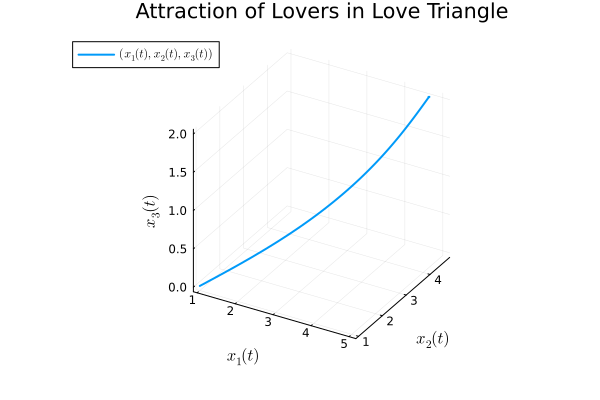

In [7]:
using LaTeXStrings

plot(sol, idxs=(1, 2, 3), linewidth=2, title ="Attraction of Lovers in Love Triangle",
    xaxis = L"x_1(t)", yaxis = L"x_2(t)", zaxis=L"x_3(t)", label=L"(x_1(t), x_2(t), x_3(t))"
)

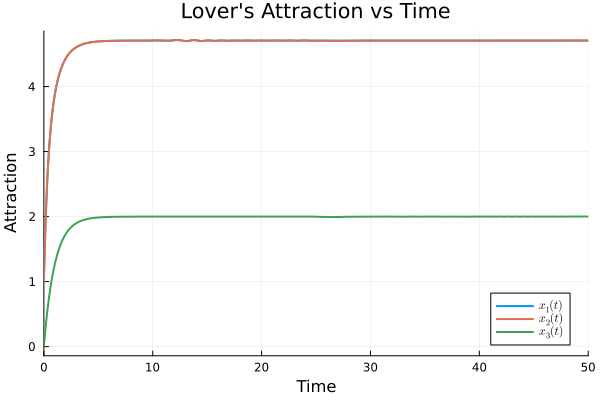

In [8]:
plot(sol, linewidth=2, title ="Lover's Attraction vs Time", xaxis = "Time", 
    yaxis = "Attraction", label=[L"x_1(t)" L"x_2(t)" L"x_3(t)"]
)